In [1]:
from sklearn import datasets

In [2]:
ds = datasets.load_diabetes()

In [3]:
print(ds['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, train_size=0.5)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
clf = DecisionTreeRegressor()

In [8]:
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
mean_squared_error(y_test, clf.predict(X_test))

np.float64(4961.085972850678)

In [12]:
mean_squared_error(y_train, clf.predict(X_train))

np.float64(0.0)

In [13]:
import numpy as np

In [14]:
res = np.zeros(X_test.shape[0])

In [15]:
N = 100

In [16]:
clf = DecisionTreeRegressor()

In [19]:
for i in range(N):
  ind = np.random.choice(np.arange(X_train.shape[0]),
                         size = X_train.shape[0],
                         replace=True)
  clf.fit(X_train[ind], y_train[ind])
  res += clf.predict(X_test)

In [ ]:
mean_squared_error(y_test, res/N)

3388.0759022624434

In [20]:
res = np.zeros(X_test.shape[0])

In [29]:
N = 100

In [30]:
clf = DecisionTreeRegressor()

In [35]:
for i in range(N):
  ind = np.random.choice(np.arange(X_train.shape[0]),
                         size = X_train.shape[0],
                         replace=True)
  ind_feat = np.random.choice(np.arange(X_test.shape[1]),
                         size = int(0.2*X_test.shape[1]))
  clf.fit(X_train[ind][:, ind_feat], y_train[ind])
  res += clf.predict(X_test[:, ind_feat])

In [40]:
mean_squared_error(y_test, res/N)

np.float64(251691766.51825026)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
clf = RandomForestRegressor(n_estimators=100, max_features=0.2)

In [44]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.2)

In [46]:
mean_squared_error(y_test, clf.predict(X_test))

np.float64(3163.960866515837)

In [47]:
import matplotlib.pyplot as plt


In [48]:
Q = []

In [49]:
for n_est in range(1, 200, 2):
  clf = RandomForestRegressor(n_estimators=n_est, max_features=0.2)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))

Text(0, 0.5, 'MSE')

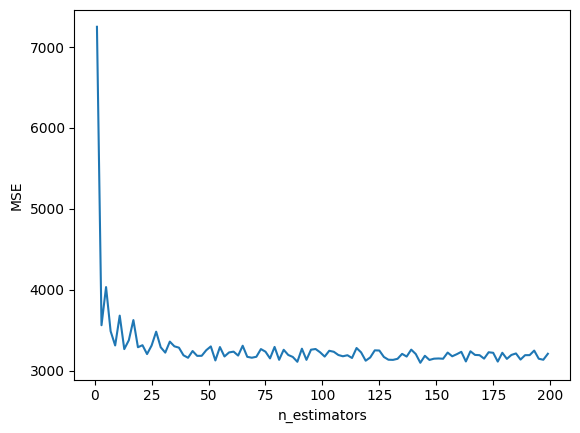

In [50]:
plt.plot(range(1, 200, 2), Q)
plt.xlabel('n_estimators')
plt.ylabel('MSE')

In [51]:
Q = []

In [52]:
for m_f in range(1, 11):
  clf = RandomForestRegressor(n_estimators=100, max_features=m_f)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))

Text(0, 0.5, 'MSE')

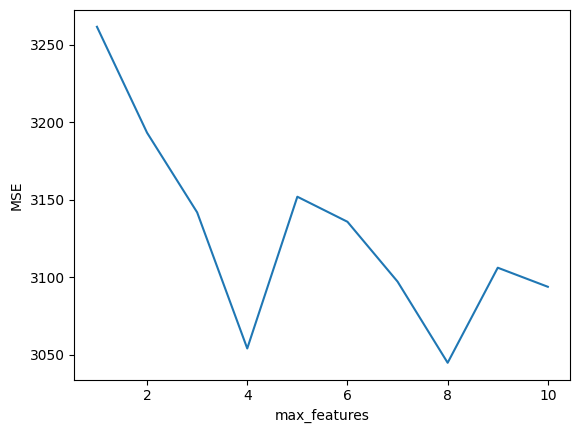

In [53]:
plt.plot(range(1, 11), Q)
plt.xlabel('max_features')
plt.ylabel('MSE')

In [55]:
clf = RandomForestRegressor(n_estimators=200, max_features=0.2)
clf.fit(X_train, y_train)
mean_squared_error(y_test,  clf.predict(X_test))

np.float64(3141.7411624434385)

In [56]:
clf.feature_importances_

array([0.06377676, 0.01466146, 0.21906802, 0.13457909, 0.07366108,
       0.07209898, 0.10090029, 0.07244734, 0.16691476, 0.08189222])

In [58]:
import seaborn as sns
import pandas as pd

In [59]:
features_imp = pd.DataFrame({'importance': clf.feature_importances_,
                             'name': ds.feature_names})

<Axes: xlabel='importance', ylabel='name'>

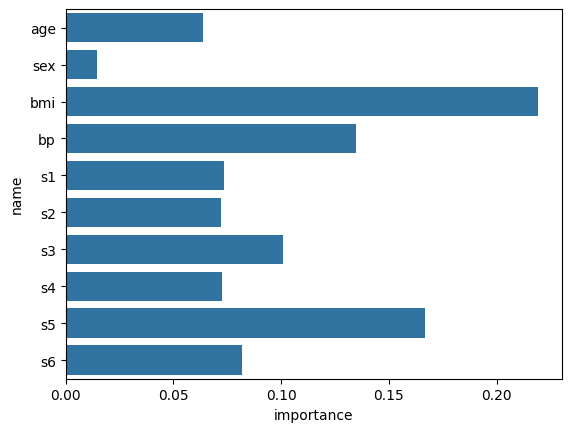

In [60]:
sns.barplot(x='importance', y='name', data=features_imp)

In [61]:
ds.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Удалим из списка индексов признак BMI и посмотрим как изменится качество

In [64]:
ind = np.append(np.arange(2), np.arange(3, 10))
clf = RandomForestRegressor(n_estimators=200, max_features=0.2)
clf.fit(X_train[:, ind], y_train)

RandomForestRegressor(max_features=0.2, n_estimators=200)

In [65]:
mean_squared_error(y_test, clf.predict(X_test[:, ind]))

np.float64(3649.309702375566)

Удалим из списка индексов признак SEX и посмотрим как изменится качество

In [66]:
ind = np.append(np.arange(1), np.arange(2, 10))
clf.fit(X_train[:, ind], y_train)
mean_squared_error(y_test, clf.predict(X_test[:, ind]))

np.float64(3370.274521606335)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()

In [72]:
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
mean_squared_error(y_test, lr.predict(X_test))

np.float64(3199.3334535477056)

In [74]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

(i*lr.predict(X_test) +(100 - i)*clf.predict(X_test))/100.0  
Это взвешенная оценка, сначала одно имеет бОльший вес, затем другое  

Нахера это надо? не знаю, эта дура на практике ниче не объяснила  
Цель — найти оптимальное сочетание предсказаний обеих моделей, чтобы минимизировать общую ошибку. Взвешенное комбинирование позволяет адаптировать вклад каждой модели в конечное предсказание, учитывая их сильные и слабые стороны:  

Если модель lr работает лучше, её вклад может быть выше (например, i/100 = 0.8, то есть 80% предсказания будет от lr).  
Если модель clf лучше предсказывает, её вклад может быть выше (например, при i/100 = 0.2, 80% от clf и 20% от lr).  

In [77]:
min_mse = mean_squared_error(y_test, lr.predict(X_test))
for i in range(100):
  mse = mean_squared_error(y_test, (i*lr.predict(X_test) +(100 - i)*clf.predict(X_test))/100.0)
  if mse < min_mse:
    min_mse = mse
    best_i = i

In [78]:
mean_squared_error(y_test, (best_i*lr.predict(X_test) + \
                            (100 - best_i)*clf.predict(X_test))/100.0)

np.float64(3052.068550624768)